In [1]:
import pandas as pd
import numpy as np
import json
import pprint
%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns; sns.set_theme()
from sklearn import preprocessing
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
file_path = "../happiness_data/merged_happiness.csv"
merged_happiness_df = pd.read_csv(file_path)
merged_happiness_df.drop(columns=['Unnamed: 0'], inplace=True)
merged_happiness_df

,Country,Happiness,GDP per Capita,Social Support,Life Expectancy,Freedom,Corruption,Generosity,Year,latitude,longitude
0,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015,46.818188,8.227512
1,Switzerland,7.5090,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,2016,46.818188,8.227512
2,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017,46.818188,8.227512
3,Switzerland,7.4870,1.420000,1.549000,0.927000,0.660000,0.256000,0.357000,2018,46.818188,8.227512
4,Switzerland,7.4800,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000,2019,46.818188,8.227512
...,...,...,...,...,...,...,...,...,...,...,...
1079,Gambia,5.0510,7.686000,0.690000,55.160000,0.697000,0.424000,0.746000,2021,13.443182,-15.310139
1080,Hong Kong S.A.R. of China,5.5104,10.934671,0.845969,76.771706,0.779834,0.134980,0.420607,2020,NaN,NaN
1081,Hong Kong S.A.R. of China,5.4770,11.000000,0.836000,76.820000,0.717000,0.067000,0.403000,2021,NaN,NaN
1082,Maldives,5.1976,9.518633,0.913161,70.599998,0.853963,0.038085,0.824211,2020,3.202778,73.220680


In [3]:
# metric_list = ['Happiness', 'GDP per Capita', 'Social Support','Life Expectancy', 'Freedom', 'Corruption', 'Generosity']
# for metric in metric_list:
#     merged_happiness_df[metric] = merged_happiness_df[metric].astype(float)
#     null_value = merged_happiness_df[metric].isnull().values.sum()
#     print(f"{metric} has null values: {null_value}")
#     na_value = merged_happiness_df[metric].isna().values.sum()
#     print(f"{metric} has na values: {na_value}")
merged_happiness_df[['Happiness', 'GDP per Capita', 'Social Support','Life Expectancy', 'Freedom', 'Corruption', 'Generosity']] = merged_happiness_df[['Happiness', 'GDP per Capita', 'Social Support','Life Expectancy', 'Freedom', 'Corruption', 'Generosity']].fillna(merged_happiness_df[['Happiness', 'GDP per Capita', 'Social Support','Life Expectancy', 'Freedom', 'Corruption', 'Generosity']].median())
merged_happiness_df
# df[['rating', 'points']] = df[['rating', 'points']].fillna(df[['rating', 'points']].median())

,Country,Happiness,GDP per Capita,Social Support,Life Expectancy,Freedom,Corruption,Generosity,Year,latitude,longitude
0,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015,46.818188,8.227512
1,Switzerland,7.5090,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,2016,46.818188,8.227512
2,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017,46.818188,8.227512
3,Switzerland,7.4870,1.420000,1.549000,0.927000,0.660000,0.256000,0.357000,2018,46.818188,8.227512
4,Switzerland,7.4800,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000,2019,46.818188,8.227512
...,...,...,...,...,...,...,...,...,...,...,...
1079,Gambia,5.0510,7.686000,0.690000,55.160000,0.697000,0.424000,0.746000,2021,13.443182,-15.310139
1080,Hong Kong S.A.R. of China,5.5104,10.934671,0.845969,76.771706,0.779834,0.134980,0.420607,2020,NaN,NaN
1081,Hong Kong S.A.R. of China,5.4770,11.000000,0.836000,76.820000,0.717000,0.067000,0.403000,2021,NaN,NaN
1082,Maldives,5.1976,9.518633,0.913161,70.599998,0.853963,0.038085,0.824211,2020,3.202778,73.220680


In [ ]:
merged_happiness_df.describe()

In [ ]:
column_list = merged_happiness_df.columns
column_list

In [ ]:
metric_list = column_list[column_list.isin(['Happiness', 'GDP per Capita', 'Social Support',
       'Life Expectancy', 'Freedom', 'Corruption', 'Generosity']) == True]

for col in metric_list:
    fig1 = plt.figure("Figure 1")
    plt.figure(figsize = (5, 5))
    plt.ylabel(f"{col}")
    plt.xlabel("Happiness")
    plt.scatter(merged_happiness_df["Happiness"], merged_happiness_df[col])
    fig1.tight_layout(pad = 5)
    plt.show()

In [ ]:
quartiles = merged_happiness_df["Happiness"].quantile([.25, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lowerq, lower_bound, upperq, upper_bound, iqr)

outliers = merged_happiness_df.loc[(merged_happiness_df["Happiness"] <= lower_bound) & (merged_happiness_df["Happiness"] >= upper_bound), :]
outliers

In [ ]:
# scaling normalization
for metric in metric_list:
    max = merged_happiness_df[metric].max()
    min = merged_happiness_df[metric].min()
    merged_happiness_df[metric + ' ' + "Scaled"] = (merged_happiness_df[metric] - min)/(max - min)
    
merged_happiness_df

In [ ]:
# log scaling for loop
for metric in metric_list:
    merged_happiness_df[metric + ' ' + "Log"] = np.log10(merged_happiness_df[metric])
    
merged_happiness_df

In [ ]:
# normalization using z-score
for metric in metric_list:
    mean = merged_happiness_df[metric].mean()
    std = merged_happiness_df[metric].std()
    merged_happiness_df[metric + ' ' + "Z Scale"] = (merged_happiness_df[metric] - mean)/std
merged_happiness_df

<AxesSubplot:>

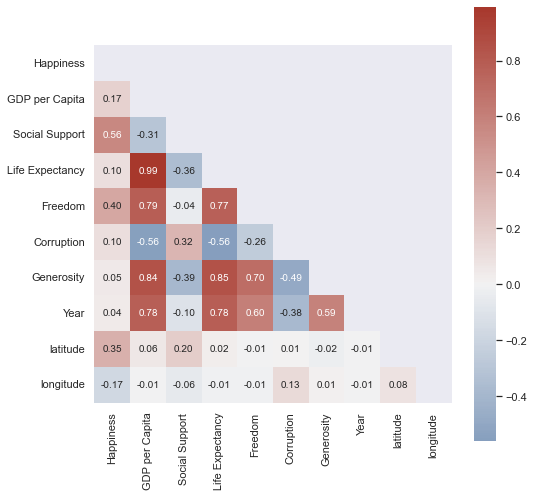

In [6]:
matrix = merged_happiness_df.corr()
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

fig, axis = plt.subplots(1,1,figsize=(8, 8))
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

In [ ]:
happiness_no_outliers_df = merged_happiness_df.loc[(merged_happiness_df["Happiness"] > lower_bound) & (merged_happiness_df["Happiness"] < upper_bound), :]
happiness_no_outliers_df

In [ ]:
for col in metric_list:
    fig2 = plt.figure("Figure 2")
    plt.figure(figsize = (5, 5))
    plt.ylabel(f"{col}")
    plt.xlabel("Happiness")
    plt.scatter(happiness_no_outliers_df["Happiness"], happiness_no_outliers_df[col])
    fig1.tight_layout(pad = 5)
    plt.show()

In [ ]:
fig3 = plt.figure("Figure 3")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_happiness_df["Happiness Log"], merged_happiness_df["GDP per Capita Log"])
regress_values = merged_happiness_df["GDP per Capita Log"] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2))
plt.scatter(merged_happiness_df["GDP per Capita Log"], merged_happiness_df["Happiness Log"])
plt.plot(merged_happiness_df["GDP per Capita Log"], regress_values, "r--")
plt.xlabel("GDP per Capita Log")
plt.ylabel("Happiness Log")
plt.title("GDP Log vs Happiness Log w/ Regression and r-squared")
plt.figtext(0.3, 0.3, line_eq, fontsize=10, color = "r")
r2_value = f"r-squared: {round(rvalue**2, 2)}"
plt.figtext(0.34, 0.25, r2_value, fontsize=10, color = "r")
plt.show()

In [ ]:
col_list = merged_happiness_df.columns
print(col_list)
metric_list = col_list[col_list.isin(['Happiness', 'GDP per Capita', 'Social Support',
       'Life Expectancy', 'Freedom', 'Corruption', 'Generosity', 'Year',
       'latitude', 'longitude', 'Happiness Scaled', 'GDP per Capita Scaled',
       'Social Support Scaled', 'Life Expectancy Scaled', 'Freedom Scaled',
       'Corruption Scaled', 'Generosity Scaled', 'Happiness Log',
       'GDP per Capita Log', 'Social Support Log', 'Life Expectancy Log',
       'Freedom Log', 'Corruption Log', 'Generosity Log', 'Happiness Z Scale',
       'GDP per Capita Z Scale', 'Social Support Z Scale',
       'Life Expectancy Z Scale', 'Freedom Z Scale', 'Corruption Z Scale',
       'Generosity Z Scale']) == True]
for metric in metric_list:
    merged_happiness_df[metric] = merged_happiness_df[metric].astype(float)
    null_value = merged_happiness_df[metric].isnull().values.sum()
    print(f"{metric} has null values: {null_value}")
    na_value = merged_happiness_df[metric].isna().values.sum()
    print(f"{metric} has na values: {na_value}")
    merged_happiness_df[metric] = merged_happiness_df[metric].fillna(merged_happiness_df[metric].median, inplace = True)

    
# for i in range(len(merged_happiness_df.columns)):
#     print(i.unique())
    
    

In [ ]:
fig4 = plt.figure("Figure 4")
plt.hist(merged_happiness_df["Happiness"], 5, density=True, alpha=0.7)
plt.hist(merged_happiness_df["Happiness Log"], 5, density=True, alpha=0.7)
plt.hist(merged_happiness_df["Happiness Z Scale"], 5, density=True, alpha=0.7)
plt.hist(merged_happiness_df["Happiness Scaled"], 5, density=True, alpha=0.7)
plt.show()

In [ ]:
merged_happiness_test = merged_happiness_df.loc[merged_happiness_df["Year"] < 2020, :]
merged_happiness_test["Year"].value_counts()

In [ ]:
# log scaling for GDP
merged_happiness_df["GDP log"] = np.log10(merged_happiness_df["GDP per Capita"])
merged_happiness_df

In [ ]:
fig5 = plt.figure("Figure 4")
plt.hist(happiness_no_outliers_df["GDP per Capita"] , 5, color='cyan', density=True, alpha=0.7)
plt.hist(merged_happiness_df["GDP per Capita"], 5, density=True, alpha=0.7)
plt.axvline(happiness_no_outliers_df["GDP per Capita"].mean(), color='cyan', linestyle='dashed', linewidth=2)
plt.axvline(merged_happiness_df["GDP per Capita"].mean(), linestyle='dashed', linewidth=2)
# plt.set_facecolor("White")
plt.axhline(linewidth=4, color='black')
plt.axvline(linewidth=1.5, color='black')   
plt.show()

In [ ]:
# defining the dependent and independent variables
# X = dataset['MinTemp'].values.reshape(-1,1)
# y = dataset['MaxTemp'].values.reshape(-1,1)
X = merged_happiness_df[["GDP per Capita Log"]]
Y = merged_happiness_df[["Happiness Log"]]
  
# building the model and fitting the data
y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_transpose = X.transpose()
X_transpose

In [ ]:
Y